In [1]:
from keras.models import Sequential
from keras.layers import Dense, TimeDistributed, Activation, LSTM
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# sample text
sample = 'hihello'

char_set = list(set(sample)) # id -> char ['i', 'l', 'e', 'o', 'h']
char_dic = {w: i for i, w in enumerate(char_set)}

x_str = sample[:-1]
y_str = sample[1:]

data_dim = len(char_set)
timesteps = len(y_str)
num_classes = len(char_set)

print(data_dim)
print(timesteps)
print(num_classes)
print(x_str, y_str)

5
6
5
hihell ihello


In [3]:
x = [char_dic[c] for c in x_str] # char to index
y = [char_dic[c] for c in y_str] # char to index

print(x)
print(y)

[4, 1, 4, 2, 3, 3]
[1, 4, 2, 3, 3, 0]


In [4]:
# One-hot encoding
x = np_utils.to_categorical(x, num_classes = num_classes)
# reshape X to be [samples, time steps, features]
x = np.reshape(x, (-1, len(x), data_dim))
print(x.shape)

(1, 6, 5)


In [5]:
# One-hot encoding
y = np_utils.to_categorical(y, num_classes = num_classes)
# time steps
y = np.reshape(y, (-1, len(y), data_dim))
print(y.shape)

(1, 6, 5)


In [6]:
model = Sequential()

model.add(LSTM(num_classes * 128, input_shape = (timesteps, data_dim), return_sequences = True))
model.add(LSTM(num_classes * 64, return_sequences = True))
model.add(LSTM(num_classes * 16, return_sequences = True))
model.add(LSTM(num_classes * 4, return_sequences = True))
model.add(TimeDistributed(Dense(num_classes)))
model.add(Activation('softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 640)            1653760   
                                                                 
 lstm_1 (LSTM)               (None, 6, 320)            1230080   
                                                                 
 lstm_2 (LSTM)               (None, 6, 80)             128320    
                                                                 
 lstm_3 (LSTM)               (None, 6, 20)             8080      
                                                                 
 time_distributed (TimeDistr  (None, 6, 5)             105       
 ibuted)                                                         
                                                                 
 activation (Activation)     (None, 6, 5)              0         
                                                        

In [8]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [9]:
history = model.fit(x, y, epochs = 200)

Epoch 1/200
1/1 [==============================] - 17s 17s/step - loss: 1.6092 - accuracy: 0.1667
Epoch 2/200
1/1 [==============================] - 0s 81ms/step - loss: 1.5990 - accuracy: 0.3333
Epoch 3/200
1/1 [==============================] - 0s 85ms/step - loss: 1.5905 - accuracy: 0.3333
Epoch 4/200
1/1 [==============================] - 0s 75ms/step - loss: 1.5814 - accuracy: 0.3333
Epoch 5/200
1/1 [==============================] - 0s 94ms/step - loss: 1.5711 - accuracy: 0.3333
Epoch 6/200
1/1 [==============================] - 0s 105ms/step - loss: 1.5587 - accuracy: 0.3333
Epoch 7/200
1/1 [==============================] - 0s 89ms/step - loss: 1.5437 - accuracy: 0.3333
Epoch 8/200
1/1 [==============================] - 0s 99ms/step - loss: 1.5256 - accuracy: 0.3333
Epoch 9/200
1/1 [==============================] - 0s 116ms/step - loss: 1.5044 - accuracy: 0.3333
Epoch 10/200
1/1 [==============================] - 0s 99ms/step - loss: 1.4810 - accuracy: 0.3333
Epoch 11/200
1/1 

In [10]:
predictions = model.predict(x, verbose = 0)

for i, prediction in enumerate(predictions):
  print(prediction)
  x_index = np.argmax(x[i], axis = 1)
  x_str = [char_set[j] for j in x_index]
  print(x_index, ''.join(x_str))

  index = np.argmax(prediction, axis = 1)
  result = [char_set[j] for j in index]
  print(index, ''.join(result))

[[5.74277528e-02 3.27906251e-01 1.23532705e-01 6.84900135e-02
  4.22643244e-01]
 [3.90206906e-03 1.43472269e-01 5.55067696e-02 8.49428307e-03
  7.88624644e-01]
 [2.05693487e-03 1.35100828e-02 8.93162131e-01 4.14563194e-02
  4.98145483e-02]
 [5.73009253e-03 2.08278396e-03 3.75457741e-02 9.52325225e-01
  2.31614173e-03]
 [6.81624562e-02 1.15045044e-03 1.43554462e-02 9.15284097e-01
  1.04755000e-03]
 [8.80731106e-01 7.63182004e-04 9.02816467e-03 1.09017223e-01
  4.60295822e-04]]
[4 1 4 2 3 3] hihell
[4 4 2 3 3 0] hhello


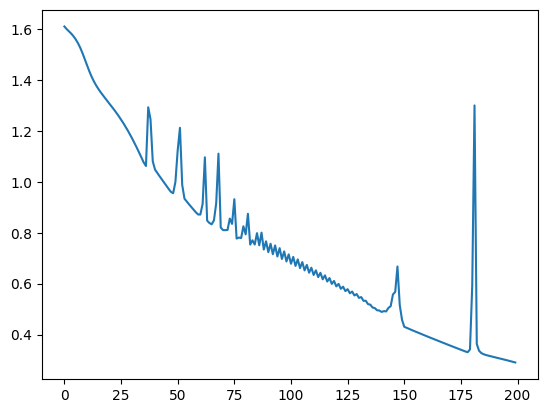

In [11]:
plt.plot(history.history['loss'])
plt.show()